In [1]:
# naive bayes do funstatic job in nlp


## Classification

# naive Bayes

### problem Statement
- predict the new customer will purchase the product

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df =  pd.read_csv('./Social_Network_Ads.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.drop('User ID', axis = 1, inplace = True)

In [8]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [9]:
# trasform the textual data to numeric data
# this can be done in following ways 
     #1. lable encoding (similar to factor in R)
     #2. one hot encoding


In [11]:
from sklearn.preprocessing import LabelEncoder
# create an encoder object
encoder = LabelEncoder()
#fit the encoder
encoder.fit(df['Gender'])
# traslate the column
df['Gender'] = encoder.transform(df['Gender'])

In [12]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [31]:
encoder.classes_

array(['Female', 'Male'], dtype=object)

In [15]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<AxesSubplot:>

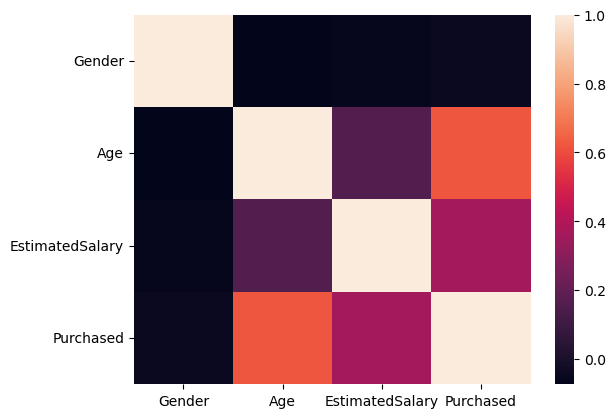

In [17]:
sns.heatmap(df.corr())

In [18]:
x = df.drop(['Gender', 'Purchased'], axis = 1)
y = df['Purchased']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 12345)

### model building

In [22]:
def build_logistic_regression():
    from sklearn.linear_model import LogisticRegressionCV
# create model
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    return model

In [23]:
def build_naive_bayes_model():
    from sklearn.naive_bayes import GaussianNB
    
    # create a model
    model = GaussianNB()

    # train the model
    model.fit(x_train, y_train)

    return model

In [24]:
# get logistic regression model
model_lg = build_logistic_regression()
# get nb model
model_nb = build_naive_bayes_model()

## model evaluation

In [27]:
def evaluate_model(model):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    y_true = y_test
    y_pred = model.predict(x_test)
    # get confusion matrics
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(f"accuracy = {accuracy_score(y_true, y_pred) * 100:.2f}")
    print(f"precision = {precision_score(y_true, y_pred) * 100:.2f}")
    print(f"recall = {recall_score(y_true, y_pred) * 100:.2f}")
    print(f"F1 score = {f1_score(y_true, y_pred) * 100:.2f}")


In [28]:
evaluate_model(model_lg)

[[68  2]
 [32 18]]
accuracy = 71.67
precision = 90.00
recall = 36.00
F1 score = 51.43


In [29]:
evaluate_model(model_nb)

[[66  4]
 [16 34]]
accuracy = 83.33
precision = 89.47
recall = 68.00
F1 score = 77.27


In [ ]:
# 